In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [70]:
import io
data = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
#viewing columns and rows
data.shape

(48895, 16)

In [ ]:
#Descriptive statistics for numerical values
data.describe()


In [71]:
#Dropping columns that are unnecessary for our analysis
data.drop('id', axis = 1, inplace= True)
#data.drop('host_name', axis = 1, inplace = True)
#data.drop('calculated_host_listings_count', axis=1, inplace=True)
data.drop('last_review', axis = 1, inplace =True)

#Renaming columns
data = data.rename(columns={'neighbourhood_group': 'borough',
                            'neighbourhood': 'neighborhood',
                            'listing_price': 'price'})
data.columns

Index(['name', 'host_id', 'host_name', 'borough', 'neighborhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [7]:
#counting null values for each value
missing_values_count = np.sum(data.isnull())
missing_values_count

name                    16
host_id                  0
borough                  0
neighborhood             0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month    10052
availability_365         0
dtype: int64

In [8]:
total_cells = np.product(data.shape)
total_missing =  missing_values_count.sum()

#calculating the percentage of missing values
percentage_missing = np.round((total_missing / total_cells) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing) 

Percentage of missing values in the dataset: 1.72


In [9]:
#Imputation of missing values with median values
data['reviews_per_month'] = data.reviews_per_month.fillna(data.reviews_per_month.median())

In [10]:
#Dropping null values and counting the dropped rows
cleaned_df = data.dropna(axis = 0, how ='any') #Dropping Rows with at least 1 null value
print(len(data) - len(cleaned_df ), 'rows were dropped with missing values.') 

16 rows were dropped with missing values.


In [11]:
np.sum(cleaned_df.isnull())

name                 0
host_id              0
borough              0
neighborhood         0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

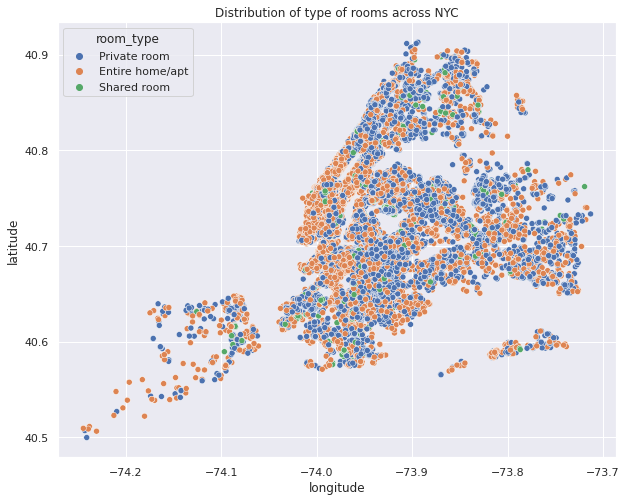

In [74]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=data.longitude, y=data.latitude,hue=data.room_type)
ax.set_title('Distribution of type of rooms across NYC')

In [13]:
#Median Listing Price by borough
median_listing_price = data.groupby('borough')['price'].agg('median').sort_values(ascending = False)
np.round(median_listing_price, 2)

borough
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

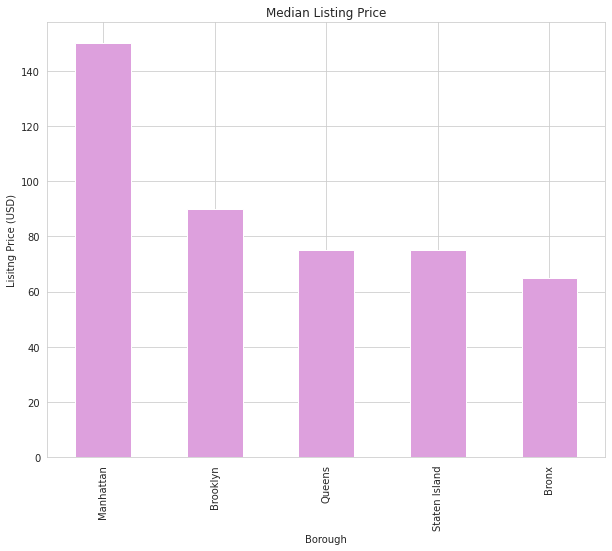

In [14]:
#Plotting median listing price
median_listing_price.plot(kind='bar', title = "Median Listing Price", figsize=(10,8), color = '#DDA0DD')
_ = plt.xlabel('Borough')
_ = plt.ylabel('Lisitng Price (USD)')

In [16]:
listings_boroughs = data.groupby('borough')['name'].count().sort_values(ascending = False)
listings_boroughs

borough
Manhattan        21652
Brooklyn         20098
Queens            5666
Bronx             1090
Staten Island      373
Name: name, dtype: int64

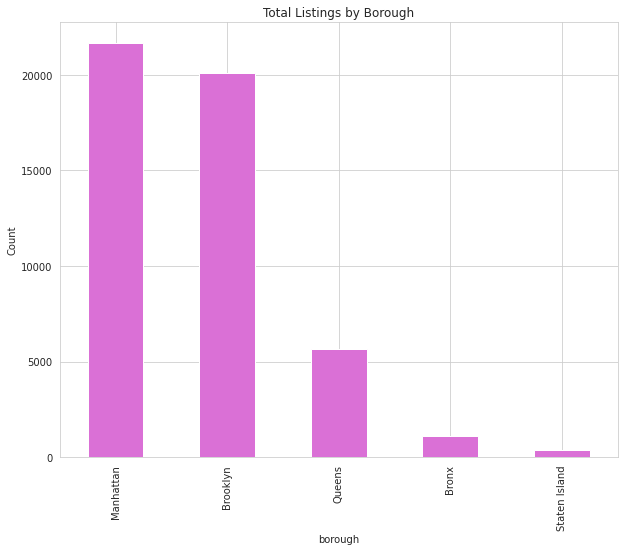

In [19]:
#plotting
listings_boroughs.plot(kind = 'bar', title = 'Total Listings by Borough',  figsize=(10,8), color = '#DA70D6')
_ = plt.ylabel('Count')

In [21]:
#Median Listing Price By Room Type
median_price_room_type = data.groupby('room_type')['price'].agg('median').sort_values(ascending = False)
np.round(median_price_room_type,2)

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

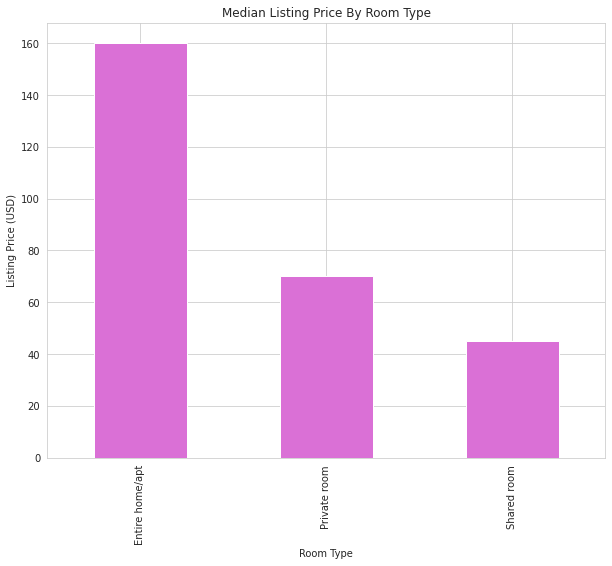

In [23]:
#Plotting 
median_price_room_type.plot(kind = 'bar', title = 'Median Listing Price By Room Type', figsize=(10,8), color = '#DA70D6')
_ = plt.xlabel('Room Type')
_ = plt.ylabel('Listing Price (USD)')

In [25]:
top_ten_neighborhoods = data.groupby('neighborhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighborhood
Financial District    200.0
West Village          200.0
Midtown               210.0
Flatiron District     225.0
Willowbrook           249.0
NoHo                  250.0
Neponsit              274.0
Tribeca               295.0
Woodrow               700.0
Fort Wadsworth        800.0
Name: price, dtype: float64

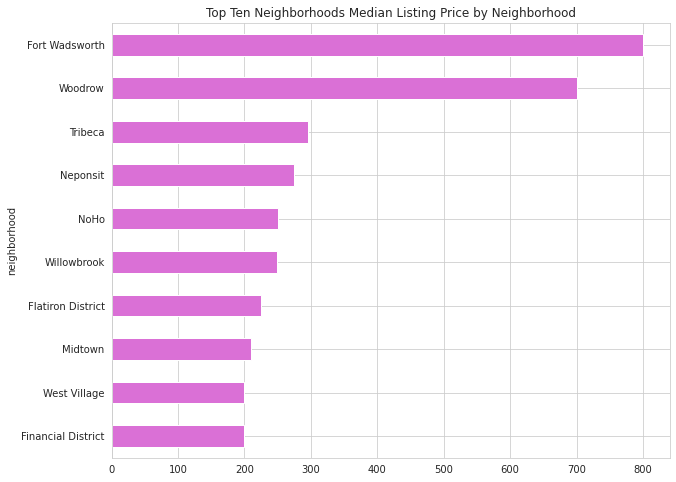

In [46]:
_ = top_ten_neighborhoods.plot(kind = 'barh', title = 'Top Ten Neighborhoods Median Listing Price by Neighborhood', figsize=(10,8), color = '#DA70D6')

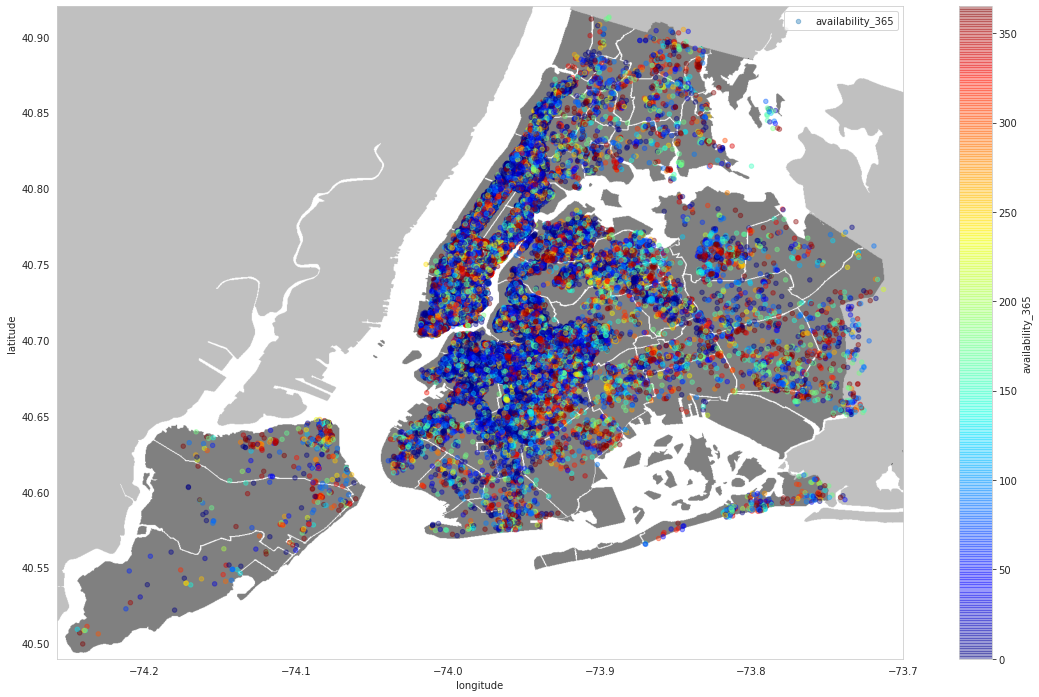

In [28]:
import urllib
#initializing the figure size
plt.figure(figsize=(20,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

fig = data.plot(kind = 'scatter', x="longitude", y="latitude", label='availability_365', c = 'availability_365',
        ax = ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12), grid = False)


plt.legend()
plt.show()

In [45]:
#Median Listing Price By Room Type
sum_price_room_type = data.groupby('room_type')['price'].agg('sum').sort_values(ascending = False)
np.round(sum_price_room_type,2)

room_type
Entire home/apt    5381480
Private room       2004450
Shared room          81348
Name: price, dtype: int64

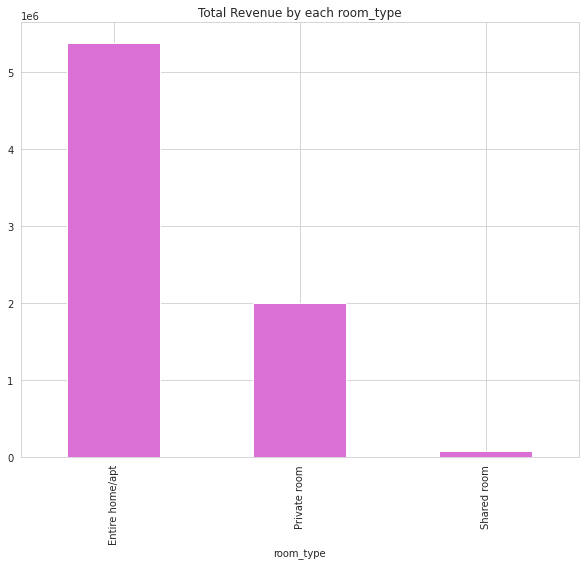

In [42]:
#sum_price_room_type.plot(title = 'Total Listings by Borough',  figsize=(10,8), color = '#DA70D6')
sum_price_room_type.plot(kind = 'bar', title = 'Total Revenue by each room_type',  figsize=(10,8), color = '#DA70D6')

In [48]:
average_price_room_type = data.groupby('borough')['price'].agg('mean').sort_values(ascending = False)
np.round(average_price_room_type,2)

borough
Manhattan        196.88
Brooklyn         124.38
Staten Island    114.81
Queens            99.52
Bronx             87.50
Name: price, dtype: float64

In [55]:
top_10_hosts=data['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Top 10 hosts on the basis of no of listings in entire NYC!')

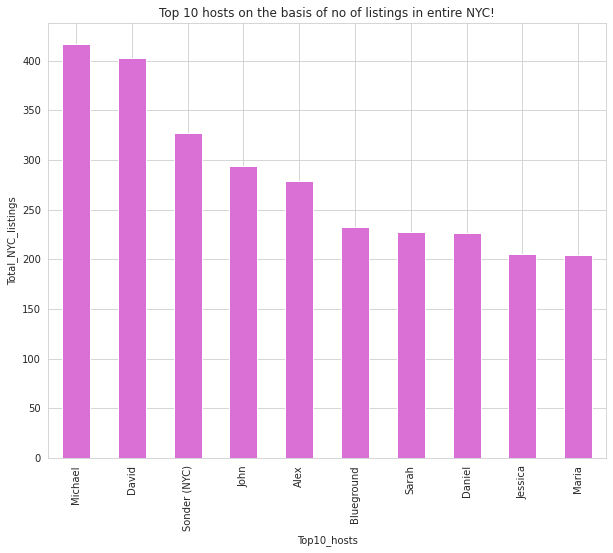

In [58]:
top_10_hosts.plot(kind='bar',color='#DA70D6', figsize=(10,8))
plt.xlabel('Top10_hosts')
plt.ylabel('Total_NYC_listings')
plt.title('Top 10 hosts on the basis of no of listings in entire NYC!')

In [59]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

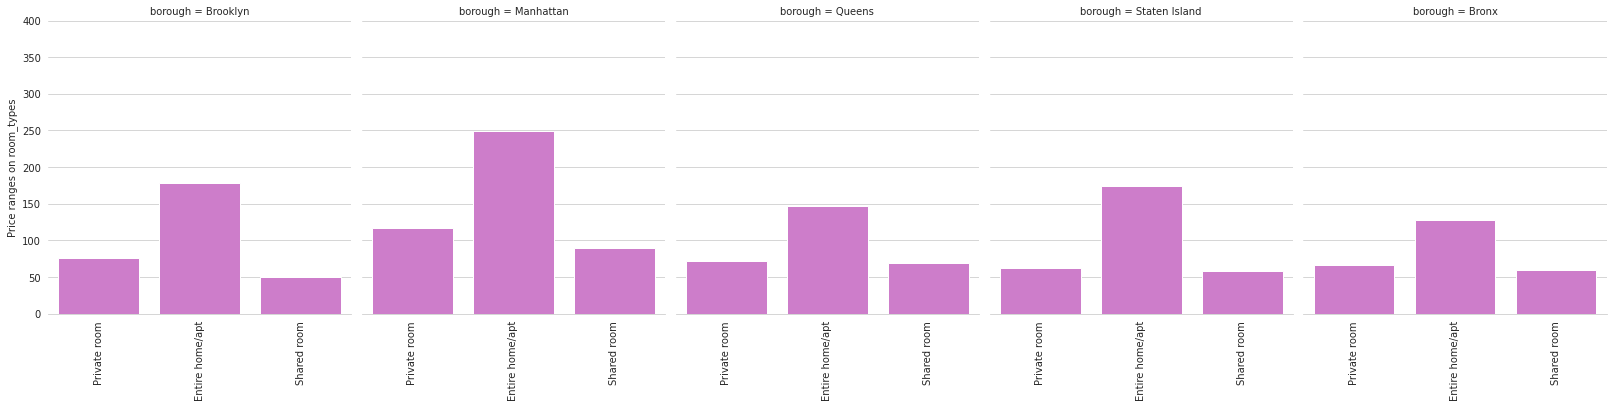

In [69]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="borough",
                data=data, color = "#DA70D6",
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True))

In [73]:
host_with_most_listings= data.groupby(['host_name','borough'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,borough,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824
